In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import threading
import time

In [2]:
!v4l2-ctl --list-devices

292A-AR0230: USB Camera (usb-0000:00:14.0-3):
	/dev/video0
	/dev/video1
	/dev/video4
	/dev/video5

BisonCam, NB Pro: BisonCam, NB  (usb-0000:00:14.0-8):
	/dev/video2
	/dev/video3



In [3]:
vidcap = cv2.VideoCapture(0)

In [ ]:
t1 = time.time()
times = []
while(True):
    
    ret, frame = vidcap.read()
    
    frame = np.flipud(np.fliplr(frame))
    
    frame[239:241, :, :] = 0
    frame[:, 319:321, :] = 0
    
    # Display the resulting frame
    cv2.imshow('frame', frame)
    
    t2 = time.time()
    elapsed = t2 - t1
    #time.sleep(max(.05-elapsed, 0))
    t1 = t2
    times.append(elapsed)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [25]:
times = [t*1000 for t in times]

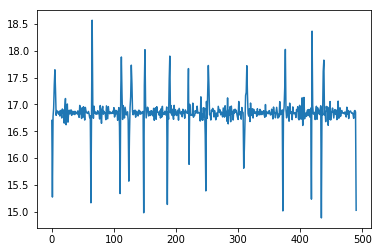

In [26]:
plt.plot(times[100:])

In [101]:
t1 = time.time()
while(True):
    
    ret, frame = vidcap.read()
    
    frame = cv2.resize(frame, (256, 192)) # this didn't seem to slow it down at all
    #frame = np.flip(frame, -1) # bgr -> rgb
    frame = frame[32:32+128, :, :]

    # cam mounted upside down
    #frame = np.fliplr(frame)
    #frame = np.flipud(frame)
    
    frames.append(frame)
    
    # Display the resulting frame
    cv2.imshow('frame', frame)
    
    t2 = time.time()
    elapsed = t2 - t1
    time.sleep(max(.05-elapsed, 0))
    t1 = t2
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [16]:
len(frames)

3294

In [17]:
# Make vid
run_id = "basement_test"
imgs = frames[10:-10]
img1 = imgs[0]
height , width, channels = img1.shape
fps = 30

video = cv2.VideoWriter(f'/home/beans/openpilot/vids/{run_id}.avi', cv2.VideoWriter_fourcc(*"MJPG"), fps, (width,height))

for i in range(len(imgs)-1):
    img = imgs[i] # cv2 expects out of 255, integers
    #img = np.flip(img,-1) #rgb -> bgr
    video.write(img)

cv2.destroyAllWindows()
video.release()